1. Выбрать набор данных (датасет), содержащий категориальные и
числовые признаки и пропуски в данных. Для выполнения
следующих пунктов можно использовать несколько различных
наборов данных (один для обработки пропусков, другой для
категориальных признаков и т.д.) Просьба не использовать датасет,
на котором данная задача решалась в лекции.
2. Для выбранного датасета (датасетов) на основе материалов лекций
решить следующие задачи:
a. устранение пропусков в данных;
b. кодирование категориальных признаков;
c. нормализация числовых признаков.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, PowerTransformer
from scipy.stats import yeojohnson

In [ ]:
data = pd.read_csv("./Spotify_Youtube.csv")

In [ ]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['Unnamed: 0', 'Danceability', 'Energy', 'Key', 'Loudness',
       'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
       'Valence', 'Tempo', 'Duration_ms', 'Views', 'Likes', 'Comments',
       'Stream'],
      dtype='object')

## Устранение пропусков в данных

In [ ]:
list(zip(data.columns, [i for i in data.dtypes]))

[('Unnamed: 0', dtype('int64')),
 ('Artist', dtype('O')),
 ('Url_spotify', dtype('O')),
 ('Track', dtype('O')),
 ('Album', dtype('O')),
 ('Album_type', dtype('O')),
 ('Uri', dtype('O')),
 ('Danceability', dtype('float64')),
 ('Energy', dtype('float64')),
 ('Key', dtype('float64')),
 ('Loudness', dtype('float64')),
 ('Speechiness', dtype('float64')),
 ('Acousticness', dtype('float64')),
 ('Instrumentalness', dtype('float64')),
 ('Liveness', dtype('float64')),
 ('Valence', dtype('float64')),
 ('Tempo', dtype('float64')),
 ('Duration_ms', dtype('float64')),
 ('Url_youtube', dtype('O')),
 ('Title', dtype('O')),
 ('Channel', dtype('O')),
 ('Views', dtype('float64')),
 ('Likes', dtype('float64')),
 ('Comments', dtype('float64')),
 ('Description', dtype('O')),
 ('Licensed', dtype('O')),
 ('official_video', dtype('O')),
 ('Stream', dtype('float64'))]

In [ ]:
# Колонки с пропусками
cols_with_na = [c for c in data.columns if data[c].isnull().sum() > 0]
cols_with_na

['Danceability',
 'Energy',
 'Key',
 'Loudness',
 'Speechiness',
 'Acousticness',
 'Instrumentalness',
 'Liveness',
 'Valence',
 'Tempo',
 'Duration_ms',
 'Url_youtube',
 'Title',
 'Channel',
 'Views',
 'Likes',
 'Comments',
 'Description',
 'Licensed',
 'official_video',
 'Stream']

In [ ]:
data.shape

(20718, 28)

In [ ]:
# Количество пропусков
[(c, data[c].isnull().sum()) for c in cols_with_na]

[('Danceability', 2),
 ('Energy', 2),
 ('Key', 2),
 ('Loudness', 2),
 ('Speechiness', 2),
 ('Acousticness', 2),
 ('Instrumentalness', 2),
 ('Liveness', 2),
 ('Valence', 2),
 ('Tempo', 2),
 ('Duration_ms', 2),
 ('Url_youtube', 470),
 ('Title', 470),
 ('Channel', 470),
 ('Views', 470),
 ('Likes', 541),
 ('Comments', 569),
 ('Description', 876),
 ('Licensed', 470),
 ('official_video', 470),
 ('Stream', 576)]

In [ ]:
# Доля (процент) пропусков
[(c, data[c].isnull().mean()) for c in cols_with_na]

[('Danceability', 9.653441451877595e-05),
 ('Energy', 9.653441451877595e-05),
 ('Key', 9.653441451877595e-05),
 ('Loudness', 9.653441451877595e-05),
 ('Speechiness', 9.653441451877595e-05),
 ('Acousticness', 9.653441451877595e-05),
 ('Instrumentalness', 9.653441451877595e-05),
 ('Liveness', 9.653441451877595e-05),
 ('Valence', 9.653441451877595e-05),
 ('Tempo', 9.653441451877595e-05),
 ('Duration_ms', 9.653441451877595e-05),
 ('Url_youtube', 0.022685587411912348),
 ('Title', 0.022685587411912348),
 ('Channel', 0.022685587411912348),
 ('Views', 0.022685587411912348),
 ('Likes', 0.026112559127328894),
 ('Comments', 0.027464040930591755),
 ('Description', 0.042282073559223865),
 ('Licensed', 0.022685587411912348),
 ('official_video', 0.022685587411912348),
 ('Stream', 0.02780191138140747)]

### Удаление пропущенных значений

In [ ]:
# Колонки для которых удаляются пропуски
cols_with_na_temp = ['Danceability',
                     'Energy',
                     'Key',
                     'Loudness',
                     'Speechiness',
                     'Acousticness',
                     'Instrumentalness',
                     'Liveness',
                     'Valence',
                     'Tempo',
                     'Duration_ms']

In [ ]:
# Удаление пропусков
data = data.dropna(subset=cols_with_na_temp)

### Удаление столбца

In [ ]:
data = data.drop(columns=['Url_youtube'])

### Заполнение показателями центра распределения

In [ ]:
# Вычисление медианы столбца
median_num_views = data["Views"].median()
median_num_likes = data["Likes"].median()
median_num_stream = data["Stream"].median()

# Заполнение пропущенных значений медианой
data["Views"].fillna(median_num_views, inplace=True)
data["Likes"].fillna(median_num_likes, inplace=True)
data["Stream"].fillna(median_num_stream, inplace=True)

### Заполнение "хвостом распределения"

In [ ]:
# Вычисление квартиля 75% для столбца "Comments"
q3 = np.percentile(data["Comments"].dropna(), 75)

# Вычисление медианы для столбца "Comments"
median_comments = data["Comments"].median()

# Заполнение пропущенных значений "хвостом распределения"
data["Comments"].fillna(q3 + 1.5*(q3-median_comments), inplace=True)

### Заполнение наиболее распространенным значением категории

In [ ]:
most_common_value = data['Licensed'].mode()[0]
data['Licensed'].fillna(value=most_common_value, inplace=True)

### Введение отдельного значения категории для пропущенных значений

In [ ]:
data['Title'].fillna(value='Unknown Title', inplace=True)
data['Channel'].fillna(value='Unknown Channel', inplace=True)
data['Description'].fillna(value='Unknown Description', inplace=True)

### Импьютация с использованием метода ближайших соседей

In [ ]:
imputer = KNNImputer()
columns_to_impute = ['official_video']
data[columns_to_impute] = imputer.fit_transform(data[columns_to_impute])

In [ ]:
data.isnull().sum()

Unnamed: 0          0
Artist              0
Url_spotify         0
Track               0
Album               0
Album_type          0
Uri                 0
Danceability        0
Energy              0
Key                 0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_ms         0
Title               0
Channel             0
Views               0
Likes               0
Comments            0
Description         0
Licensed            0
official_video      0
Stream              0
dtype: int64

## Кодирование категориальных признаков

In [ ]:
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_columns

Index(['Artist', 'Url_spotify', 'Track', 'Album', 'Album_type', 'Uri', 'Title',
       'Channel', 'Description'],
      dtype='object')

In [ ]:
data[categorical_columns].nunique()

Artist          2079
Url_spotify     2079
Track          17839
Album          11936
Album_type         3
Uri            18860
Title          18146
Channel         6715
Description    17395
dtype: int64

### Кодирование категорий целочисленными значениями - label encoding

In [ ]:
le = LabelEncoder()
for col in categorical_columns:
    if col != 'Album_type':
        data[col] = le.fit_transform(data[col])

### Кодирование категорий наборами бинарных значений - one-hot encoding

In [ ]:
data = pd.get_dummies(data, columns=['Album_type'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20716 entries, 0 to 20717
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              20716 non-null  int64  
 1   Artist                  20716 non-null  int64  
 2   Url_spotify             20716 non-null  int64  
 3   Track                   20716 non-null  int64  
 4   Album                   20716 non-null  int64  
 5   Uri                     20716 non-null  int64  
 6   Danceability            20716 non-null  float64
 7   Energy                  20716 non-null  float64
 8   Key                     20716 non-null  float64
 9   Loudness                20716 non-null  float64
 10  Speechiness             20716 non-null  float64
 11  Acousticness            20716 non-null  float64
 12  Instrumentalness        20716 non-null  float64
 13  Liveness                20716 non-null  float64
 14  Valence                 20716 non-null

## Нормализация числовых признаков

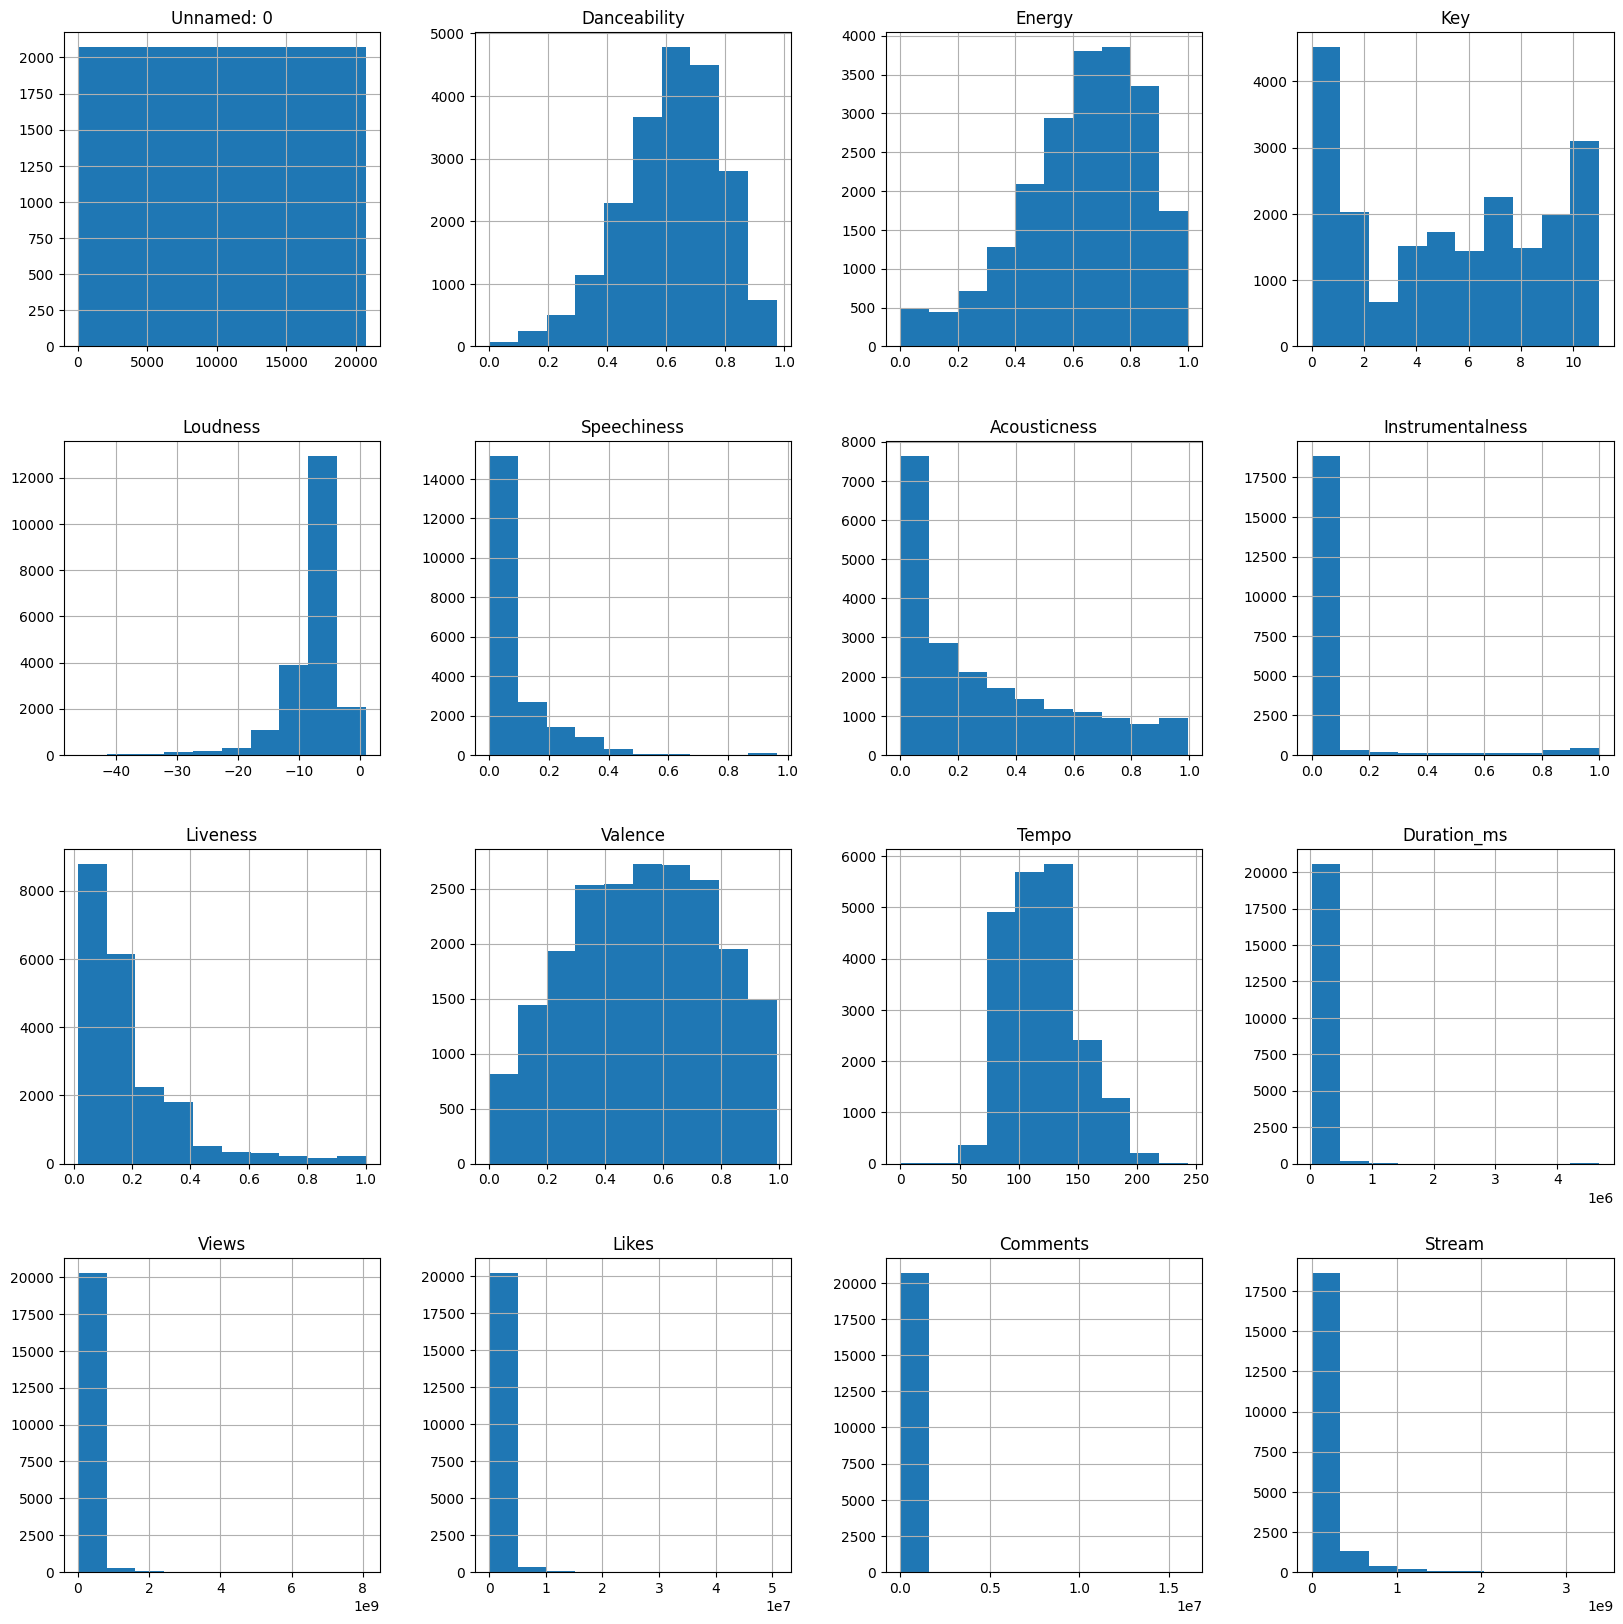

In [ ]:
data[numerical_columns].hist(figsize=(20,20))
plt.show()

In [ ]:
# Create a PowerTransformer object with the Yeo-Johnson method
transformer = PowerTransformer(method='yeo-johnson')

# Fit the transformer to the numerical columns
transformer.fit(data[numerical_columns])

# Transform the data
data[numerical_columns] = transformer.transform(data[numerical_columns])

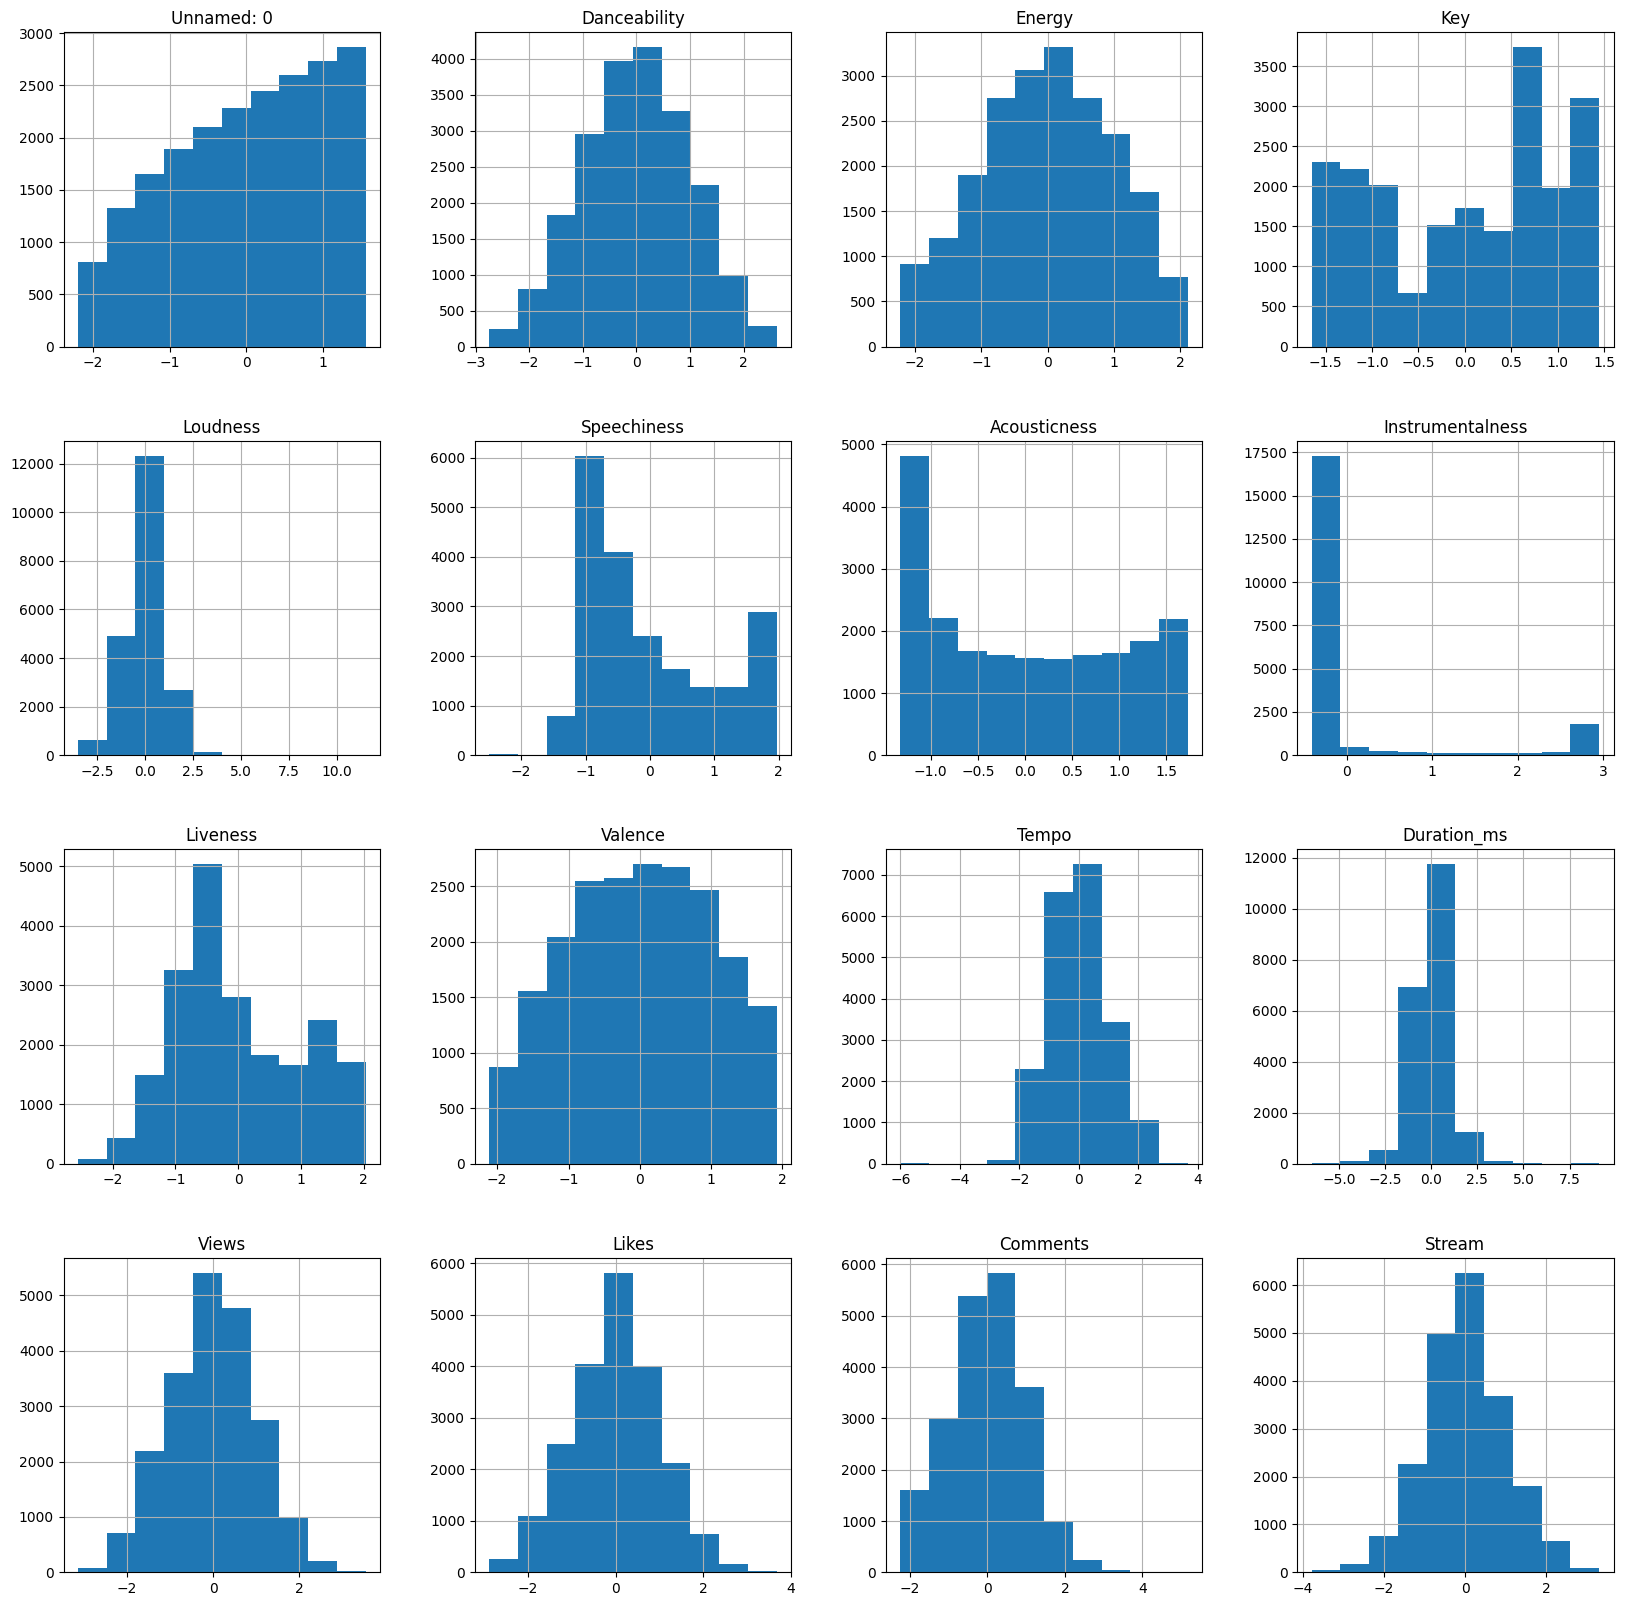

In [ ]:
data[numerical_columns].hist(figsize=(20,20))
plt.show()